# Credit Card Fraud Analysis and Detection

---

## Problem Identification

### Problem statement

How can credit card companies detect up to 90% of fraudulent transactions?

### Key data sources

- [Credit Card Fraud Detection Kaggle dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)

---

## Environment setup

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sns.set('notebook')

In [2]:
# Read CSV to Dataframe
df = pd.read_csv('../data/raw/creditcard.csv')

In [3]:
# Inspect the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


---

## Exploratory Data Analysis

In [8]:
fraudulent_count = df['Class'].value_counts()[1]
valid_count = df['Class'].value_counts()[0]
fraud_ratio = fraudulent_count / valid_count

print(f"All transactions: {len(df)}")
print(f"Valid transactions: {valid_count}")
print(f"Fraudulent transactions: {fraudulent_count}")
print(f"The ratio of marked fraudulent charges to valid is {fraud_ratio}")

All transactions: 284807
Valid transactions: 284315
Fraudulent transactions: 492
The ratio of marked fraudulent charges to valid is 0.0017304750013189597


In [9]:
# Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [10]:
# Split dataframe
df_valid = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

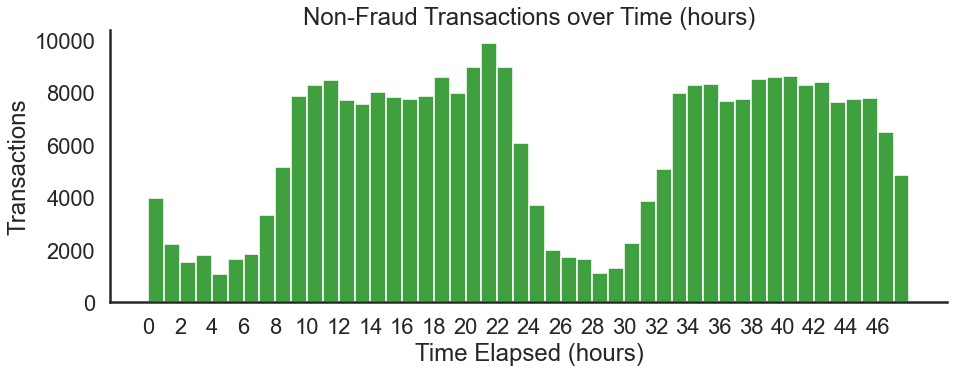

In [11]:
sns.set('poster')
sns.set_style('white')
plt.figure(figsize=(15, 5))
sns.histplot(data=df_valid, x='Time', bins=48, color='green')
plt.xticks(np.arange(0, 60*60*48, step=60*60*2), np.arange(0, 48, step=2))
plt.title('Non-Fraud Transactions over Time (hours)')
plt.xlabel('Time Elapsed (hours)')
plt.ylabel('Transactions')
sns.despine()
plt.savefig('transaction-over-time_non-fraud.png', bbox_inches = 'tight')
plt.show()

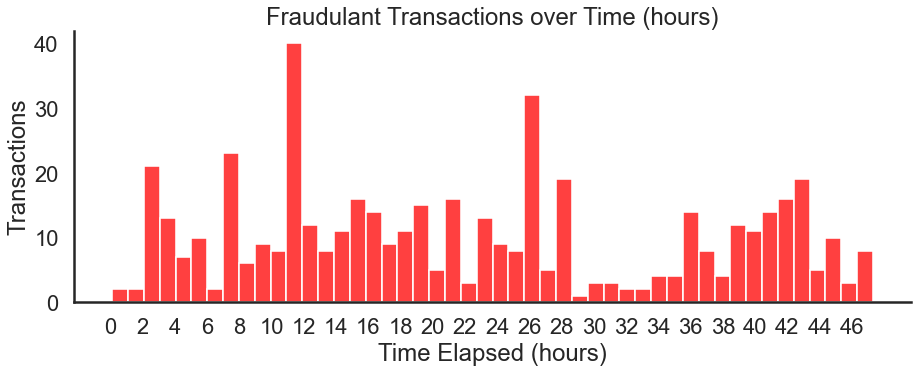

In [12]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df_fraud, x='Time', bins=48, color='red')
plt.xticks(np.arange(0, 60*60*48, step=60*60*2), np.arange(0, 48, step=2))
plt.title('Fraudulant Transactions over Time (hours)')
plt.xlabel('Time Elapsed (hours)')
plt.ylabel('Transactions')
sns.despine()
plt.savefig('transaction-over-time_fraud.png', bbox_inches = 'tight')
plt.show()

In [13]:
# Describe the valid data amounts
df_valid['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
# Describe the valid data amounts
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The average amount of fraudulent transactions are higher, which is highly undesireable. 

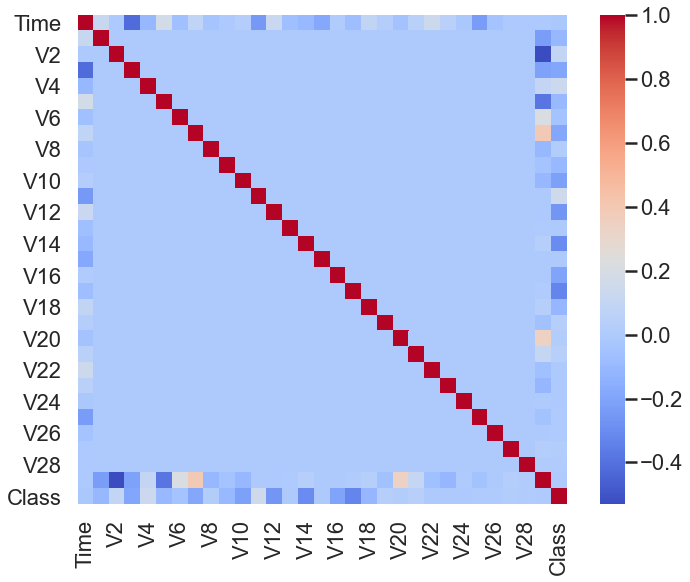

In [15]:
# Correlation matrix 
_ = plt.figure(figsize=(12, 9)) 
_ = sns.heatmap(df.corr(), square=True, cmap='coolwarm')
_ = plt.show()

While there is mostly no correlation due to PCA, we do see the following slightly significant correlations with `Amount`:
* Negative correlation with `V2` and `V5`
* Positive correlation with `V7` and `V20`